In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [83]:
df = pd.read_csv("real_estate_data.csv")

In [84]:
df.head(5)

,property,price,sqft,bedrooms,bathrooms,offers,has_brick,neighborhood
0,1,441378.50,2722,4,3,3,1,East
1,2,99968884.86,3681,5,2,3,0,North
2,3,379570.36,2172,4,2,3,1,West
3,4,585026.97,3103,4,3,4,1,South
4,5,456951.49,2596,4,4,1,0,West


In [85]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
df = remove_outliers(df_numeric)
df.head(5)

,property,price,sqft,bedrooms,bathrooms,offers,has_brick
0,1,441378.50,2722,4,3,3,1
2,3,379570.36,2172,4,2,3,1
3,4,585026.97,3103,4,3,4,1
4,5,456951.49,2596,4,4,1,0
5,6,556272.32,3747,2,2,2,1


In [86]:
correlation_coefficient = df['sqft'].corr(df['price'])
print(f"Correlation coefficient (Pandas): {correlation_coefficient:.2f}")

Correlation coefficient (Pandas): 0.88


In [87]:
x = df[['sqft']]
y = df['price']

In [88]:
model = LinearRegression()
model.fit(x, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [115.52788256]
Intercept: 157514.18774271896


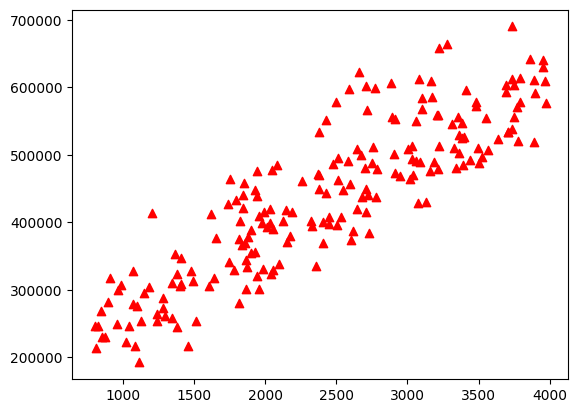

In [89]:
plt.scatter(x,y, color='red', marker='^')
plt.show()

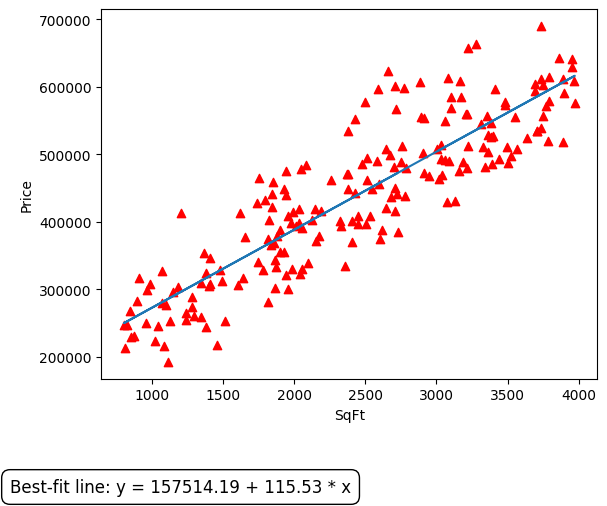

In [90]:
plt.scatter(x,y, color='red', marker='^')
#y=a+bx
b,a = model.coef_[0], model.intercept_
# b,a= np.polyfit(x,y,1)
Y1 = a+b*x
plt.plot(x,Y1)
plt.xlabel('SqFt')
plt.ylabel('Price')
label = f'Best-fit line: y = {a:.2f} + {b:.2f} * x'
plt.text(1, 8, label, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

In [91]:
Y1 = a + b * 3500
print("Pridicted Price: ", round(Y1,2))

Pridicted Price:  561861.78
